In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam, SGD



# Load Data

In [51]:
dataset = pd.DataFrame(pd.read_csv("compresive_strength_concrete.csv"))

In [13]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
print(dataset.shape)
print(dataset.columns)

(1030, 9)
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [18]:
dataset.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Check Missing Values

In [19]:
dataset.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [20]:
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [180]:
dataset.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":'Cement',
                               "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":'Blast_Furnace_Slag',
                               "Fly Ash (component 3)(kg in a m^3 mixture)":'Fly_Ash', "Water  (component 4)(kg in a m^3 mixture)": 'Water',
                               "Superplasticizer (component 5)(kg in a m^3 mixture)":'Superplasticizer',
                                "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":'Coarse-Aggregate',
                               "Fine Aggregate (component 7)(kg in a m^3 mixture)": 'Fine_Aggregate',
                                "Age (day)": "Age_day",
                        "Concrete_target ": 'Concrete_target'                          
                               }, inplace=True )

In [22]:
dataset.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Standardized the Input Variables

In [24]:
blast_mean = np.mean(dataset.Blast_Furnace_Slag)
fly_mean = np.mean(dataset.Fly_Ash)
superplastic_mean = np.mean(dataset.Superplasticizer)

In [28]:
dataset.Blast_Furnace_Slag=dataset.Blast_Furnace_Slag.mask(dataset.Blast_Furnace_Slag==0).fillna(blast_mean)
dataset.Fly_Ash=dataset.Fly_Ash.mask(dataset.Fly_Ash==0).fillna(fly_mean)
dataset.Superplasticizer=dataset.Superplasticizer.mask(dataset.Superplasticizer==0).fillna(superplastic_mean)

In [29]:
dataset

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28,79.99
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28,61.89
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270,40.27
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365,41.05
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28,44.28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28,31.18
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28,23.70
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28,32.77


In [30]:
y = dataset['Concrete compressive strength(MPa, megapascals) ']

In [31]:
x = dataset.drop(columns='Concrete compressive strength(MPa, megapascals) ')

# Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=1 - 0.50)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.30/(0.30 + 0.20)) 
print(X_train.shape, X_val.shape, X_test.shape)

(515, 8) (206, 8) (309, 8)


In [47]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std

X_test -= mean
X_test /= std


X_val -= mean
X_val /= std

# Model 

In [181]:
network = Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1))

# Compilation Step

In [182]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

# Train the Model 

In [173]:
history = network.fit(X_train, Y_train, batch_size=30,  epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
18/18 [==============================] - 0s 7ms/step - loss: 1572.5402 - mae: 36.2052 - val_loss: 1539.0114 - val_mae: 35.0001
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1487.2825 - mae: 35.0359 - val_loss: 1354.4983 - val_mae: 32.3796
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1186.5283 - mae: 30.6295 - val_loss: 843.7078 - val_mae: 24.1289
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 562.1879 - mae: 19.5452 - val_loss: 307.8203 - val_mae: 14.0980
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 277.6341 - mae: 13.2123 - val_loss: 292.7412 - val_mae: 14.1409
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 237.1631 - mae: 12.4129 - val_loss: 253.7833 - val_mae: 13.1404
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 218.5909 - mae: 11.9128 - val_loss: 250.7394 - val_mae: 13.1491
Epoch 8/100
18/18 [=================

18/18 [==============================] - 0s 2ms/step - loss: 40.0905 - mae: 4.8678 - val_loss: 48.5037 - val_mae: 5.5231
Epoch 60/100
18/18 [==============================] - 0s 1ms/step - loss: 36.1696 - mae: 4.6484 - val_loss: 42.8558 - val_mae: 5.2148
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 34.2817 - mae: 4.5591 - val_loss: 44.3410 - val_mae: 5.2948
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 35.7902 - mae: 4.5884 - val_loss: 46.3747 - val_mae: 5.3987
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 36.3690 - mae: 4.6758 - val_loss: 44.6812 - val_mae: 5.2779
Epoch 64/100
18/18 [==============================] - 0s 1ms/step - loss: 33.2386 - mae: 4.4439 - val_loss: 40.6723 - val_mae: 5.0454
Epoch 65/100
18/18 [==============================] - 0s 1ms/step - loss: 33.0360 - mae: 4.4793 - val_loss: 40.2425 - val_mae: 5.0331
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 3

In [174]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)

print('Training Loss: ' + str(train_loss[-1]))
print('*'*20)
print('Validation Loss' + str(val_loss[-1]))

Training Loss: 20.539325714111328
********************
Validation Loss29.935514450073242


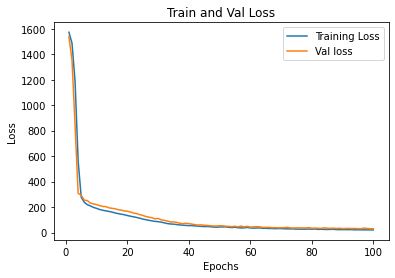

In [175]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [176]:
mae_train = history.history['mae']
mae_val= history.history['val_mae']

print('Training Loss: ' + str(mae_train[-1]))
print('*'*20)
print('Validation Loss' + str(mae_val[-1]))



Training Loss: 3.4203600883483887
********************
Validation Loss4.238070487976074


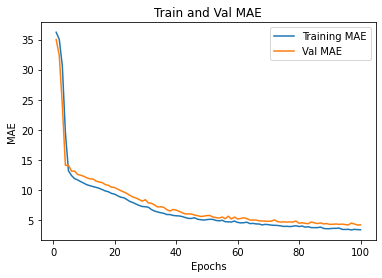

In [177]:
plt.plot(epochs, mae_train, label='Training MAE')
plt.plot(epochs, mae_val, label='Val MAE')
plt.title('Train and Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Evaluation 

In [183]:
network.evaluate(X_test, Y_test)


10/10 [==============================] - 0s 1ms/step - loss: 1513.2235 - mae: 35.1053


[1513.2235107421875, 35.10530471801758]

# Prediction

In [184]:
prediction = network.predict(X_test)

In [186]:
prediction

array([ 0.00914099,  0.06671938,  0.03870828, -0.10039556,  0.02431845,
        0.25367463,  0.01855515, -0.10281469, -0.02119658,  0.08596506,
       -0.03023008, -0.1089748 ,  0.0416315 ,  0.01705426, -0.12687498,
       -0.23527536, -0.01748978, -0.08688001,  0.02454158, -0.01757406,
       -0.14015289, -0.1363619 ,  0.13596614,  0.02457776,  0.3122632 ,
       -0.00316168,  0.06825423, -0.08423793,  0.08272472,  0.01709899,
       -0.01166494, -0.06463735, -0.14769831,  0.00154962,  0.05946719,
       -0.13187493,  0.11416388, -0.13087709,  0.0896963 ,  0.0637937 ,
        0.06796253,  0.0090841 ,  0.06449044,  0.02995044,  0.12293384,
       -0.23035368,  0.2290112 , -0.13609484, -0.1591169 , -0.0224206 ,
        0.09906633,  0.01875139,  0.02198065, -0.06485949, -0.00264389,
        0.09402599, -0.03625027,  0.06481375,  0.07207571, -0.04744604,
        0.37307352,  0.0726695 , -0.01368198,  0.06452195,  0.23903531,
        0.26518822,  0.01431749,  0.12508647,  0.06722061, -0.08

In [185]:
prediction=prediction.reshape(309)

output = pd.DataFrame({'Actual': Y_test})

output['prediction'] = prediction

output.reset_index(inplace=True)

output['Absolute Error'] = np.abs(output['prediction'] - output['Actual'])

output



,index,Actual,prediction,Absolute Error
0,879,44.39,0.009141,44.380859
1,589,31.90,0.066719,31.833281
2,1,61.89,0.038708,61.851292
3,133,67.70,-0.100396,67.800396
4,482,56.14,0.024318,56.115682
...,...,...,...,...
304,43,53.10,0.057384,53.042616
305,857,33.30,-0.106750,33.406750
306,930,30.88,0.019864,30.860136
307,895,49.77,-0.030344,49.800344
